# Handwritten Digits Recognition 01 - Scikit-learn

In this project, we are interested in building models that can classify images of handwritten digits. The goal is to create models that can determine which digit is written in the input image. Although the standard practice is to train with MNIST database, I found scikit-learn having difficulties handling large databases like MNIST. In this notebook, we will train three models — support vector machine, k nearest-neightbout and random forest — using the scikit-learn digits database instead.

## Loading scikit-learn digits database

First, let's load the scikit-learn digits data set and separate training and testing data. 80% of the data are used to train the models, while the rest are using in testing. Also, each image is stored in an array with 64 elements, which means that the images are 8x8 pixels.

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
print("Size of data set:", len(digits.data))
print("-" * 50)

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
print("Training set dimension:", x_train.shape, y_train.shape)
print("Testing set dimension:", x_test.shape, y_test.shape)

Size of data set: 1797
--------------------------------------------------
Training set dimension: (1437, 64) (1437,)
Testing set dimension: (360, 64) (360,)


We can visualize the images. The figure below contains the first eight images in the data set and their labels. The quality is low, but the digits are somewhat recognizable.

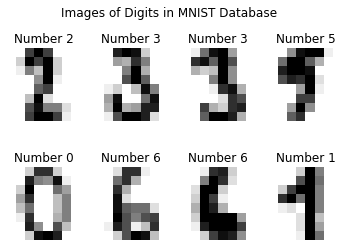

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4)
for n, ax in zip(range(8), axes.flatten()):
    image = x_train[n].reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Number %d" % y_train[n])
    ax.set_axis_off()

fig.suptitle("Images of Digits in MNIST Database")
plt.show()

## Building machine learning models

Here we train three models with the training set.

1. Support vector machine (SVM)
2. k nearest-neighbour (kNN)
3. Random forest (RF)

The parameters were adjusted to avoid overfitting.


In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Dictionary to store training and testing results
labels = {"Support vector machine": [0, 0], 
          "k nearest-neighbour": [0, 0], 
          "Random forest": [0, 0]}

In [11]:
# Set up the models with their specifications

models = [SVC(kernel = 'poly', gamma = 'scale', max_iter = 10000), 
          KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 5), 
          RandomForestClassifier(max_depth = 8, max_features = 0.3, n_estimators = 100)]

In [12]:
# Train and evaluate the success rate of each model

import numpy as np

def success_rate(x, y, model):
    p = model.predict(x)
    return round(sum(np.equal(p, y))/len(y), 5) * 100

for data, model in zip(labels, models):
    
    # Train the models
    model.fit(x_train, y_train)
    
    # Evaluate the success rates
    labels[data][0] = success_rate(x_train, y_train, model)
    labels[data][1] = success_rate(x_test, y_test, model)

We can organize the training and testing results in a table. SVM is slightly overfitted, but RF is much worse. In terms of accuracy, SVM stands out with over 99% accuracy on both training and testing set, making it the best model for digits recognition.

In [13]:
import pandas as pd

df = pd.DataFrame(labels)
df.insert(0, "Success rate", ['Training', 'Testing'])
df

,Success rate,Support vector machine,k nearest-neighbour,Random forest
0,Training,99.861,99.235,99.861
1,Testing,99.167,98.889,96.389


## Saving the model trained

Lastly, we may save the model. In the future, should we need the model, we will not have to train again.

In [14]:
from joblib import dump
file_name = 'svm_model.joblib'
dump(models[0], file_name)

['svm_model.joblib']